In [121]:
import numpy as nd
import pandas as pd
!pip install Matplotlib

In [123]:
test_df= pd.read_csv('test_measure.csv')
subject_df= pd.read_csv('subject-info.csv')

In [5]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216143 entries, 0 to 216142
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   time     216143 non-null  int64  
 1   Speed    216143 non-null  float64
 2   HR       215817 non-null  float64
 3   VO2      213726 non-null  float64
 4   VCO2     213715 non-null  float64
 5   RR       208651 non-null  float64
 6   VE       216141 non-null  float64
 7   ID_test  216142 non-null  object 
 8   ID       216142 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 14.8+ MB


In [7]:
test_df.head()

time  Speed    HR    VO2   VCO2    RR    VE ID_test   ID
0     0    5.0  63.0  478.0  360.0  27.0  13.3     2_1  2.0
1     2    5.0  75.0  401.0  295.0  23.0  10.3     2_1  2.0
2     4    5.0  82.0  449.0  319.0  29.0  12.2     2_1  2.0
3     7    5.0  87.0  461.0  340.0  28.0  12.8     2_1  2.0
4     9    5.0  92.0  574.0  417.0  28.0  14.6     2_1  2.0

In [27]:
merged_df = pd.merge(test_df, subject_df, on='ID', how='inner')
merged_df = merged_df.drop(columns=['ID_test_y'])
merged_df

time  Speed     HR     VO2    VCO2    RR    VE ID_test_x     ID   Age  \
0          0    5.0   63.0   478.0   360.0  27.0  13.3       2_1    2.0  33.8   
1          2    5.0   75.0   401.0   295.0  23.0  10.3       2_1    2.0  33.8   
2          4    5.0   82.0   449.0   319.0  29.0  12.2       2_1    2.0  33.8   
3          7    5.0   87.0   461.0   340.0  28.0  12.8       2_1    2.0  33.8   
4          9    5.0   92.0   574.0   417.0  28.0  14.6       2_1    2.0  33.8   
...      ...    ...    ...     ...     ...   ...   ...       ...    ...   ...   
279422   931    5.0  149.0  1924.0  2587.0  40.0  79.9     332_1  332.0  14.6   
279423   932    5.0  149.0  1857.0  2521.0  40.0  79.1     332_1  332.0  14.4   
279424   932    5.0  149.0  1857.0  2521.0  40.0  79.1     332_1  332.0  14.6   
279425   934    5.0  147.0  1809.0  2463.0  40.0  77.7     332_1  332.0  14.4   
279426   934    5.0  147.0  1809.0  2463.0  40.0  77.7     332_1  332.0  14.6   

        Weight  Height  Humidity  Temperature  Sex age_Category  
0         68.0   171.1       NaN          NaN    0        Adult  
1         68.0   171.1       NaN          NaN    0        Adult  
2         68.0   171.1       NaN          NaN    0        Adult  
3         68.0   171.1       NaN          NaN    0        Adult  
4         68.0   171.1       NaN          NaN    0        Adult  
...        ...     ...       ...          ...  ...          ...  
279422    56.9   175.5      49.0         24.8    0        Child  
279423    56.6   174.0      42.0         24.4    0        Child  
279424    56.9   175.5      49.0         24.8    0        Child  
279425    56.6   174.0      42.0         24.4    0        Child  
279426    56.9   175.5      49.0         24.8    0        Child  

[279427 rows x 16 columns]

In [25]:
grouped_test_df=test_df.groupby('ID').agg({
    'VO2':'mean',
    'VCO2':'mean',
    'ID_test':'count',
    'Speed':'mean',
    'VE':'mean'
})
grouped_test_df

VO2         VCO2  ID_test      Speed         VE
ID                                                            
1.0    1995.260035  2834.308901      573   9.823211  67.304712
2.0    1881.657807  1900.094684      602   9.498505  53.193522
3.0    2398.800000  2529.297521      605  10.961322  67.140496
4.0    2739.615984  2919.159844      513   9.208382  77.876608
5.0    2533.955250  2925.130809      581   8.415146  83.900344
...            ...          ...      ...        ...        ...
328.0  2999.309963  2912.197417      542  10.082103  83.304428
329.0  2259.724031  2078.753488      645   9.323876  61.829147
330.0  2163.796897  1953.950635      709   9.880254  62.942736
331.0  2068.976512  2079.607829     1405  10.924128  63.685125
332.0  2185.772122  2144.586531     1277   9.693735  63.651449

[332 rows x 5 columns]

In [126]:
merged_df_groupID = pd.merge(grouped_test_df, subject_df, on='ID', how='inner')
#merged_df_groupID = merged_df.drop(columns=['ID_test_y'])
merged_df_groupID

ID          VO2         VCO2  ID_test_x      Speed         VE   Age  \
0      1.0  1995.260035  2834.308901        573   9.823211  67.304712  32.7   
1      2.0  1881.657807  1900.094684        602   9.498505  53.193522  33.8   
2      3.0  2398.800000  2529.297521        605  10.961322  67.140496  16.6   
3      4.0  2739.615984  2919.159844        513   9.208382  77.876608  28.5   
4      5.0  2533.955250  2925.130809        581   8.415146  83.900344  23.4   
..     ...          ...          ...        ...        ...        ...   ...   
372  330.0  2163.796897  1953.950635        709   9.880254  62.942736  14.1   
373  331.0  2068.976512  2079.607829       1405  10.924128  63.685125  14.3   
374  331.0  2068.976512  2079.607829       1405  10.924128  63.685125  14.4   
375  332.0  2185.772122  2144.586531       1277   9.693735  63.651449  14.4   
376  332.0  2185.772122  2144.586531       1277   9.693735  63.651449  14.6   

     Weight  Height  Humidity  Temperature  Sex ID_test_y  
0      67.0   173.5       NaN          NaN    0       1_1  
1      68.0   171.1       NaN          NaN    0       2_1  
2      63.8   176.0      43.0         24.6    0       3_1  
3      88.0   181.3       NaN          NaN    0       4_1  
4      85.0   181.4       NaN          NaN    0       5_1  
..      ...     ...       ...          ...  ...       ...  
372    50.0   168.9      42.0         24.2    0     330_1  
373    54.3   168.5      44.0         25.4    0     331_1  
374    53.4   170.1      49.0         24.8    0     331_7  
375    56.6   174.0      42.0         24.4    0     332_1  
376    56.9   175.5      49.0         24.8    0     332_9  

[377 rows x 13 columns]

In [371]:
#64.Compare the time it takes to multiply each element in a large array by 2 using an explicit loop and a 
#vectorized operation with NumPy 
import numpy as np
import time


array_size = 10_000   # Create a large array 
data = np.arange(array_size)

start_time = time.time()  # 1. Using a Python loop
loop_result = []
for value in data:
    loop_result.append(value * 2)
loop_time = time.time() - start_time
print(f"Time using loop: {loop_time:.4f} seconds")


start_time = time.time() # 2. Using NumPy vectorized operation
vectorized_result = data * 2

vectorized_time = time.time() - start_time
print(f"Time using NumPy vectorization: {vectorized_time:.4f} seconds")

Time using loop: 0.2758 seconds
Time using NumPy vectorization: 0.0060 seconds


In [51]:
#65. Calculate the percentage of male athletes who exceeded, the maximum treadmill speed of female athletes .male_athletes=merged_df[merged_df['Sex']==0]

female_athletes=merged_df[merged_df['Sex']==1]

max_female_speed=female_athletes['Speed'].max()

male_athletess_exceeded=male_athletes[male_athletes['Speed']>max_female_speed]

percentage = (len(male_athletess_exceeded) / len(male_athletes)) * 100
print(f"Percentage of male athletes who exceeded the max female treadmill speed: {percentage*100:.2f}%")


Percentage of male athletes who exceeded the max female treadmill speed: 87.38%


In [61]:
##66.Visualize the number of test taken by participants and their trend of maximum Vo2 level as dual chart ?

#Number of tests per participant
test_counts = subject_df.groupby('ID')['ID_test'].count().reset_index()
# Maximum VO2 per participant
max_vo2 = test_df.groupby('ID')['VO2'].max().reset_index()
# Merge the two ID
summary_df = pd.merge(test_counts, max_vo2, on='ID')
#Sort by ID or Test Count for consistent x-axis
summary_df = summary_df.sort_values(by='ID')

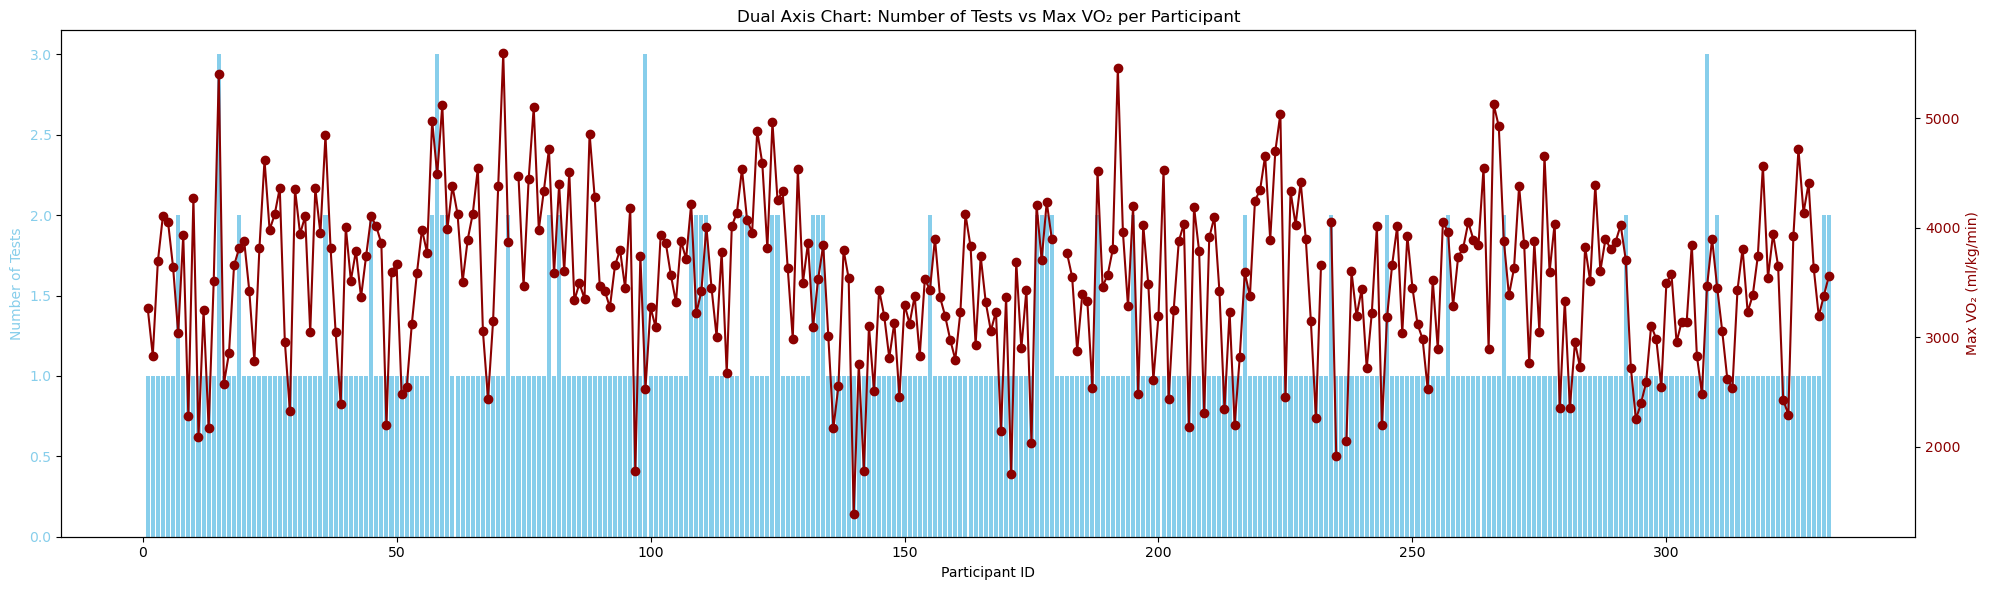

In [105]:
import matplotlib.pyplot as plt

# Extract data for plotting
IDs = summary_df['ID']
test_counts = summary_df['ID_test']
vo2max = summary_df['VO2']
# Create the plot
fig, ax1 = plt.subplots(figsize=(20,6))

# Bar chart: Number of tests
ax1.bar(IDs, test_counts, color='skyblue', label='Number of Tests')
ax1.set_ylabel('Number of Tests', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_xlabel('Participant ID')

# Second Y-axis for VO2 max
ax2 = ax1.twinx()
ax2.plot(IDs, vo2max, color='darkred', marker='o', label='Max VO2')
ax2.set_ylabel('Max VO₂ (ml/kg/min)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Title & layout
plt.title('Dual Axis Chart: Number of Tests vs Max VO₂ per Participant')
fig.tight_layout()
plt.savefig('my_plot1.png')# this allows to save your chart into .png and stores automically where your current working jupyter notebook is saved.
plt.show()

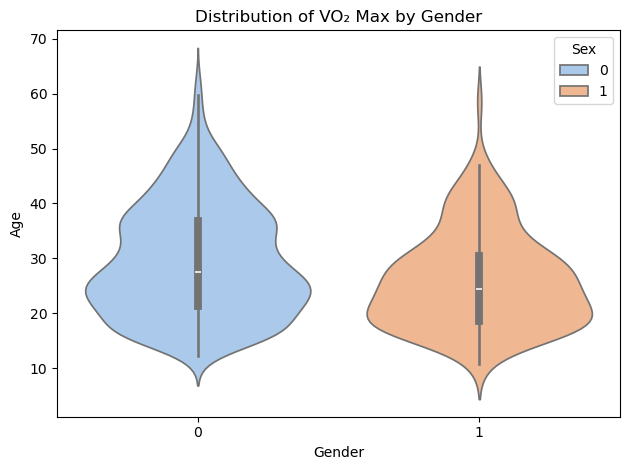

In [101]:
#67.Create violin chart for any two column from the dataset ?
import seaborn as sns
import matplotlib.pyplot as plt
# Violin chart of Age by Gender
sns.violinplot(data=subject_df, x='Sex', y='Age', hue='Sex', palette='pastel')
plt.title('Distribution of VO₂ Max by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.tight_layout()
plt.savefig('my_plot2.png')
plt.show()

In [107]:
#68.calculate BSA (Body surface area) without using function and store as column in dataframe and categorize . 

subject_df['BSA'] = 0.007184 * (subject_df['Height'] ** 0.725) * (subject_df['Weight'] ** 0.425)

#pd.cut() to categorize BSA (Body Surface Area) into custom bins — that's a solid way to bucket continuous data into 
#labels like "Small", "Average", and "Large".
# Categorize BSA
subject_df['BSA_Category'] = pd.cut(
    subject_df['BSA'],
    bins=[0, 1.5, 1.9, float('inf')],
    labels=['Small', 'Average', 'Large']
)

print(subject_df)

      Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test       BSA  \
0    10.8    48.8   163.0      39.0         20.7    1  543   543_1  1.505847   
1    11.8    41.0   150.0      41.0         22.3    1   11    11_1  1.316636   
2    12.2    46.0   160.0      37.0         21.5    0  829   829_1  1.448857   
3    13.2    71.0   190.0      49.0         23.8    1  284   284_1  1.973547   
4    13.7    53.8   169.7      40.0         25.3    0  341   341_1  1.616100   
..    ...     ...     ...       ...          ...  ...  ...     ...       ...   
987  59.1    64.7   172.0      38.0         24.4    0  856   856_2  1.765057   
988  59.7    65.2   172.0      51.0         16.8    0  856   856_3  1.770841   
989  61.3   102.0   185.0      56.0         20.5    0  390   390_1  2.257984   
990  61.6    74.0   169.0      46.0         23.9    0  596   596_1  1.845048   
991  63.0    83.5   171.5      48.0         22.2    0  296   296_1  1.963019   

    BSA_Category  
0        Average  
1

In [113]:
#69.Write a python function that efficiently processes large data into chunks to analyze average heart rate and maximum oxygen consumption for each test
#Print the chunks during processing.

def process_large_data(file_path, chunk_size =10000):
    results = {}

for i, chunk in enumerate(pd.read_csv("test_measure.csv",chunksize=10000)):
        print(f"\n--- Processing Chunk {i+1} ---")
        print(chunk.head())
        grouped = chunk.groupby("ID_test")

        for test_id, group in grouped:
            average_heart_rate= test_df.groupby('ID')['HR'].mean()
            max_vo2 = test_df.groupby('ID')['VO2'].max()
            process_large_data("test_measure.csv", chunk_size=10000)


--- Processing Chunk 1 ---
   time  Speed    HR    VO2   VCO2    RR    VE ID_test  ID
0     0    5.0  63.0  478.0  360.0  27.0  13.3     2_1   2
1     2    5.0  75.0  401.0  295.0  23.0  10.3     2_1   2
2     4    5.0  82.0  449.0  319.0  29.0  12.2     2_1   2
3     7    5.0  87.0  461.0  340.0  28.0  12.8     2_1   2
4     9    5.0  92.0  574.0  417.0  28.0  14.6     2_1   2

--- Processing Chunk 2 ---
       time  Speed     HR     VO2    VCO2    RR    VE ID_test  ID
10000   282    7.7  128.0  2693.0  2259.0  24.0  59.1    15_1  15
10001   287    7.8  128.0  2776.0  2366.0  20.0  61.9    15_1  15
10002   289    7.9  128.0  2771.0  2358.0  21.0  61.9    15_1  15
10003   292    7.9  128.0  2691.0  2302.0  22.0  60.2    15_1  15
10004   293    7.9  127.0  2691.0  2302.0  22.0  60.2    15_1  15

--- Processing Chunk 3 ---
       time  Speed     HR     VO2    VCO2    RR     VE ID_test  ID
20000  1062   19.9  168.0  4165.0  4178.0  50.0  117.3    30_1  30
20001  1063   19.9  168.0  4259.

In [129]:
#70.How does the body's production of carbon dioxide related to the consumption of oxygen with increasing levels of pulmonary ventilation during GET? 
#Use low, medium, and high bins values for VE to find your observations.

def analyze_ve_vo2_vco2_relationship(file_path):
   grouped_test_df = pd.read_csv(file_path)
    
grouped_test_df['VE_bin'] = pd.cut(
    grouped_test_df['VE'],
    bins=[0, 50.0, 90.0, float('inf')],
    labels=['low', 'medium', 'high']
)
summary = grouped_test_df.groupby('VE_bin')[['VO2', 'VCO2']].mean()
summary['VCO2/VO2 Ratio'] = summary['VCO2'] / summary['VO2']
print("\nAverage VO2, VCO2, and VCO2/VO2 ratio by VE bin:\n")
print(summary)
print("\n Observations:")
for VE_bin, row in summary.iterrows():
        print(f"\n{VE_bin} VE:")
        print(f"- Avg VO2: {row['VO2']:.2f} mL/min")
        print(f"- Avg VCO2: {row['VCO2']:.2f} mL/min")
        print(f"- VCO2/VO2 ratio: {row['VCO2/VO2 Ratio']:.2f}")
        
        if row['VCO2/VO2 Ratio'] < 1.0:
            print("  → Normal aerobic respiration.")
        elif 1.0 <= row['VCO2/VO2 Ratio'] < 1.2:
            print("  → Increased CO2 from lactate buffering.")
        else:
            print("  → High CO2 output; likely past ventilatory threshold.")



Average VO2, VCO2, and VCO2/VO2 ratio by VE bin:

                VO2         VCO2  VCO2/VO2 Ratio
VE_bin                                          
low     1500.837560  1463.440896        0.975083
medium  2343.244333  2358.281411        1.006417
high    3035.836540  3038.622613        1.000918

 Observations:

low VE:
- Avg VO2: 1500.84 mL/min
- Avg VCO2: 1463.44 mL/min
- VCO2/VO2 ratio: 0.98
  → Normal aerobic respiration.

medium VE:
- Avg VO2: 2343.24 mL/min
- Avg VCO2: 2358.28 mL/min
- VCO2/VO2 ratio: 1.01
  → Increased CO2 from lactate buffering.

high VE:
- Avg VO2: 3035.84 mL/min
- Avg VCO2: 3038.62 mL/min
- VCO2/VO2 ratio: 1.00
  → Increased CO2 from lactate buffering.


C:\Users\gprab\AppData\Local\Temp\ipykernel_12116\2643579924.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary = grouped_test_df.groupby('VE_bin')[['VO2', 'VCO2']].mean()


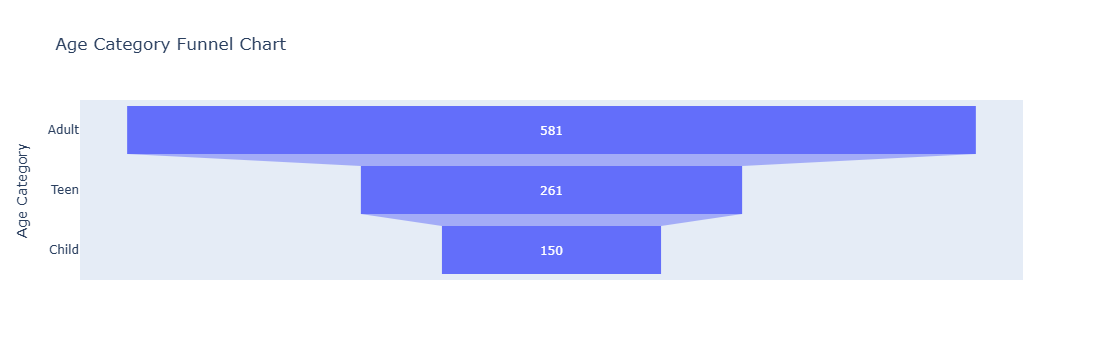

In [9]:
#71.Create a Funnel chart of Age Category (Child, Teen, Adult and Senior) ?
import plotly.express as px
# Create Age Category
def age_category(age):
    if age <= 18:
        return 'Child'
    elif age <= 25:
        return 'Teen'
    elif age <= 64:
        return 'Adult'
    else:
        return 'Senior'

subject_df['age_Category'] = subject_df['Age'].apply(age_category)
# Count each category
age_counts = subject_df['age_Category'].value_counts().reset_index()
age_counts.columns = ['Age Category', 'Count']
#funnel chart
fig = px.funnel(age_counts, x='Count', y='Age Category', title="Age Category Funnel Chart")
fig.show()

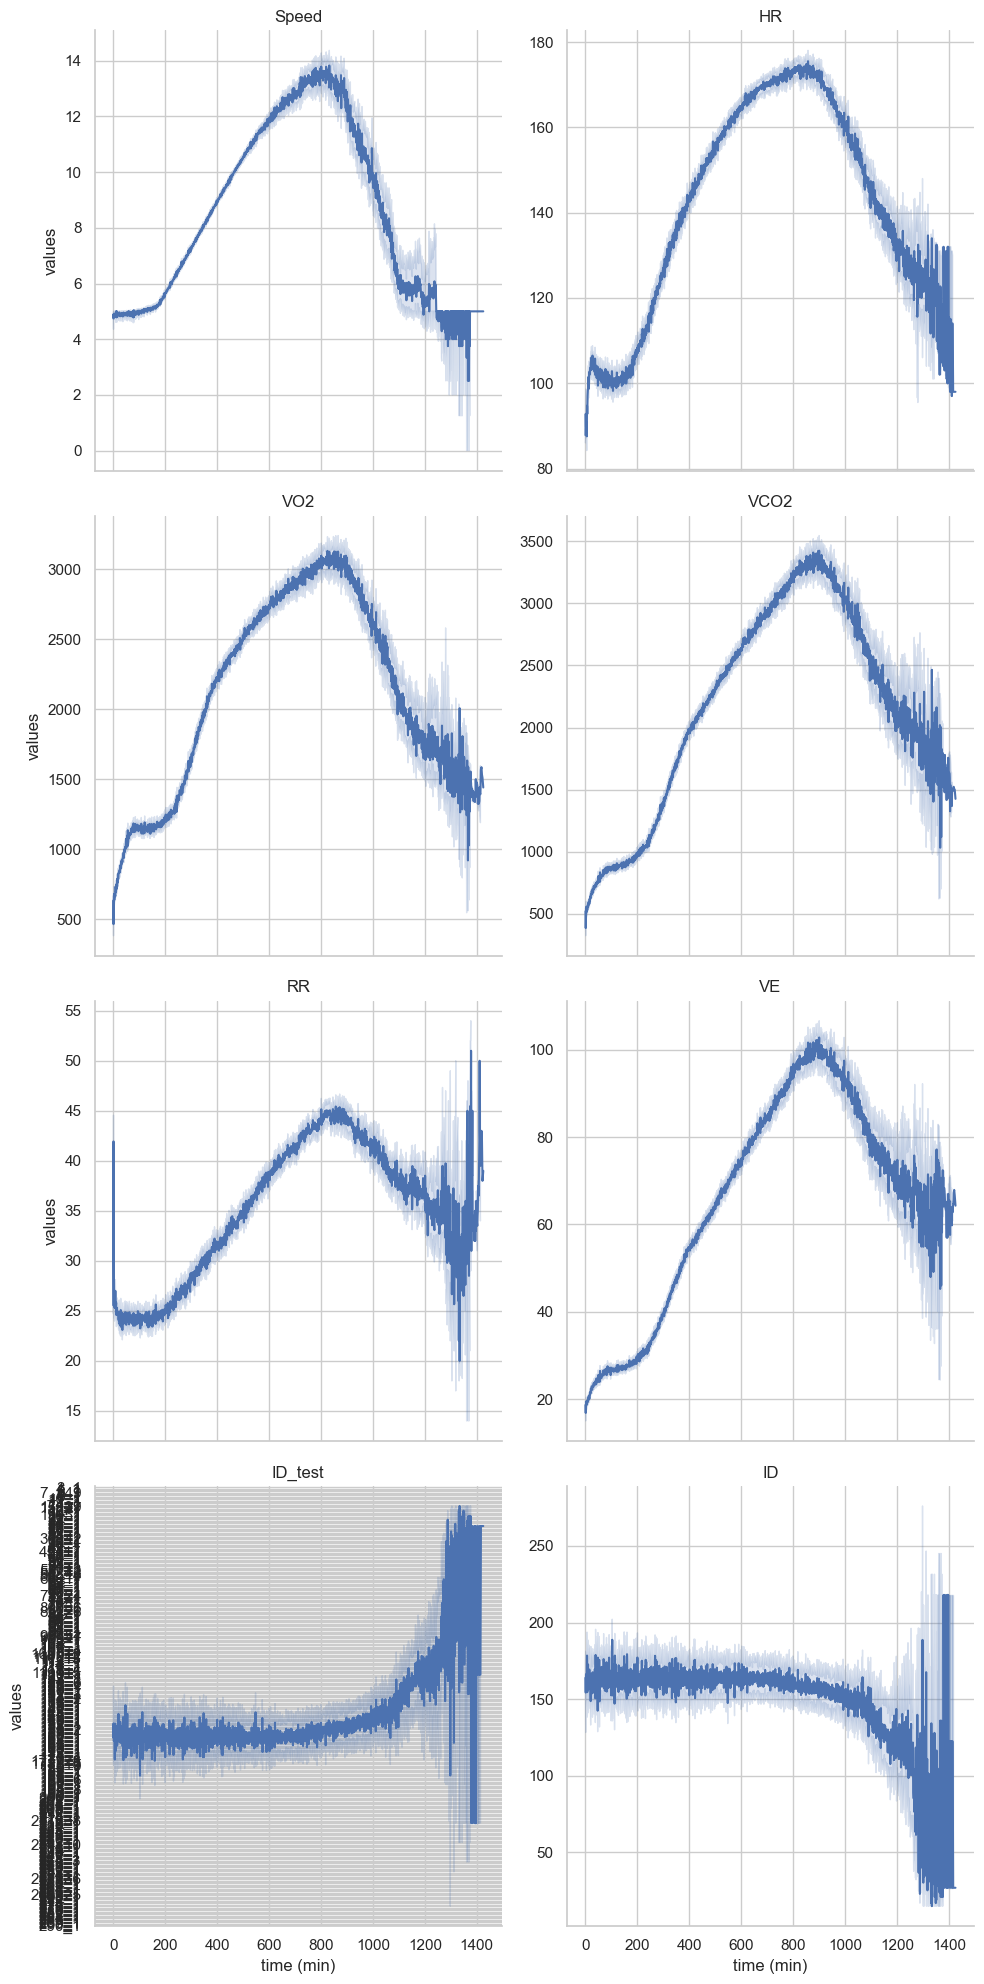

In [272]:
##72.visualize different physiological parameters over time for a specific test of an athlete using multiple panels?
import seaborn as sns
import matplotlib.pyplot as plt
df_long =test_df.melt(id_vars="time", var_name="parameter", value_name="value")
sns.set(style="whitegrid")
g = sns.relplot(
    data=df_long, 
    x="time", y="value", col="parameter", kind="line", 
    col_wrap=2, facet_kws={'sharex': True, 'sharey': False}
)
g.set_titles("{col_name}")
g.set_axis_labels("time (min)","values")
plt.show()


In [17]:
#73.Print first 10 records of the subject_info based on ID, without using head() method.
print(subject_df.iloc[:10])


    Age  Weight  Height  Humidity  Temperature  Sex   ID ID_test age_Category
0  10.8    48.8   163.0      39.0         20.7    1  543   543_1        Child
1  11.8    41.0   150.0      41.0         22.3    1   11    11_1        Child
2  12.2    46.0   160.0      37.0         21.5    0  829   829_1        Child
3  13.2    71.0   190.0      49.0         23.8    1  284   284_1        Child
4  13.7    53.8   169.7      40.0         25.3    0  341   341_1        Child
5  13.8    53.4   171.0      42.0         24.4    0  341   341_2        Child
6  14.0    46.0   160.0      40.0         25.3    0  343   343_1        Child
7  14.1    50.0   168.9      42.0         24.2    0  330   330_1        Child
8  14.1    47.2   160.2      40.0         25.2    0  338   338_1        Child
9  14.1    49.7   160.1      40.0         25.8    0  339   339_1        Child


In [53]:
#74.Determine the treadmill speed range and age range in which you observe the highest average heart rate.
age_bins = [0, 20, 30, 40, 50, 60, 70, 100]
speed_bins = [0, 4, 6, 8, 10, 12, 15]

# Cut into categories, 
merged_df['AgeGroup'] = pd.cut(merged_df['Age'], bins=age_bins)
merged_df['SpeedGroup'] = pd.cut(merged_df['Speed'], bins=speed_bins)

grouped = merged_df.groupby(['AgeGroup', 'SpeedGroup'], observed=True)['HR'].mean().reset_index()
max_row = grouped.loc[grouped['HR'].idxmax()]
print("Age range with highest avg HR:", max_row['AgeGroup'])
print("Speed range with highest avg HR:", max_row['SpeedGroup'])
print("Highest Average Heart Rate:", max_row['HR'])


Age range with highest avg HR: (60, 70]
Speed range with highest avg HR: (10, 12]
Highest Average Heart Rate: 178.94827586206895


In [264]:
#75.Identify subjects whose heart rate (HR) is consistently above their age group’s 75th percentile.

hr_75th = merged_df.groupby('Age')['HR'].quantile(0.75).reset_index() #find 75% for HR and reset index
hr_75th.columns = ['Age', 'HR_75th']    # insert 75th vslues into column name "HR_75th" 

Above_75th_df=pd.merge(merged_df,hr_75th,on="Age")#merging this 2 df

 
Above_75th_person = Above_75th_df[Above_75th_df['HR'] > Above_75th_df['HR_75th']] #check who are all above 75th %

count_above = Above_75th_df.groupby('ID').size().reset_index(name='count_above')


total_count = merged_df.groupby('ID').size().reset_index(name='total_count')#Total number of HR measurements per subject

consistently_high = pd.merge(count_above, total_count, on='ID') # Merge and filter those consistently above
result = consistently_high[consistently_high['count_above'] == consistently_high['total_count']]
print("Subjects consistently above 75th percentile HR:")
print(result['ID'].tolist())


Subjects consistently above 75th percentile HR:
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 15

In [256]:
consistently_high

ID  count_above  total_count
0      1.0          573          573
1      2.0          602          602
2      3.0          605          605
3      4.0          513          513
4      5.0          581          581
..     ...          ...          ...
327  328.0          542          542
328  329.0          645          645
329  330.0          709          709
330  331.0         2810         2810
331  332.0         2554         2554

[332 rows x 3 columns]

In [305]:
#76.list the participants ID and test _ID who started their warm up with speed less than 5km/h ?

first_speed = test_df.sort_values('time').groupby('ID_test').first().reset_index() # Get the first row of each test

slow_start = first_speed[first_speed['Speed'] < 5]#speed is less than 5

result = slow_start[['ID', 'ID_test']]
print(result)

        ID ID_test
83   163.0   163_1
131    1.0     1_1
186  247.0   247_1
188  249.0   249_1
262  310.0   310_1
266  313.0   313_1
288  332.0   332_1
299   40.0    40_1
310    4.0     4_1


In [339]:
#77.Calculate the mean VO2 max for male and female athletes in the Get Phase.

 
female_get_phase = female_athletes[female_athletes['time'] <= 5] #did already, getphase by calculate 5min of test
male_get_phase = male_athletes[male_athletes['time'] <= 5]


mean_vo2_female = female_get_phase['VO2'].mean() #mean VO2 for each gender in the getphase
mean_vo2_male = male_get_phase['VO2'].mean()

mean_vo2_by_gender = pd.DataFrame({   ## Create a DataFrame to display the results
    'Sex': ['Female', 'Male'],
    'Mean_VO2': [mean_vo2_female, mean_vo2_male]
})

print(mean_vo2_by_gender)

      Sex    Mean_VO2
0  Female  514.219251
1    Male  653.211630


In [351]:
#78.If you consider cool down time as the recovery period after reaching peak speed, display the participant details who has taken 
#the longest Cool Down time.

peak_speed_time = merged_df.loc[merged_df.groupby(['ID', 'ID_test_x'])['Speed'].idxmax()][['ID', 'ID_test_x', 'time']] #time of peak speed for each test
peak_speed_time = peak_speed_time.rename(columns={'time': 'peak_time'})

# Step 2: Get the end time (last time recorded) for each test
end_time = merged_df.groupby(['ID', 'ID_test_x'])['time'].max().reset_index()
end_time = end_time.rename(columns={'time': 'end_time'})

# Step 3: Merge both to calculate cool down time
cool_down = pd.merge(peak_speed_time, end_time, on=['ID', 'ID_test_x'])
cool_down['cool_down_duration'] = cool_down['end_time'] - cool_down['peak_time']

# Step 4: Find participant with the longest cool down time
max_cool_down = cool_down.loc[cool_down['cool_down_duration'].idxmax()]

print("Participant with longest cool down time:")
print(max_cool_down)

Participant with longest cool down time:
ID                    218.0
ID_test_x             218_1
peak_time               652
end_time               1414
cool_down_duration      762
Name: 252, dtype: object


In [359]:
#79.Identify the athlete who recorded the highest treadmill speed during the tests.
peak_speed_row = merged_df.loc[merged_df['Speed'].idxmax()]

print("Athlete with the highest treadmill speed:")
print(peak_speed_row["ID"])

Athlete with the highest treadmill speed:
27.0


[1]


C:\Users\gprab\AppData\Local\Temp\ipykernel_2256\2951679347.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\gprab\AppData\Local\Temp\ipykernel_2256\2951679347.py:15: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\gprab\AppData\Local\Temp\ipykernel_2256\2951679347.py:21: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

C:\Users\gprab\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



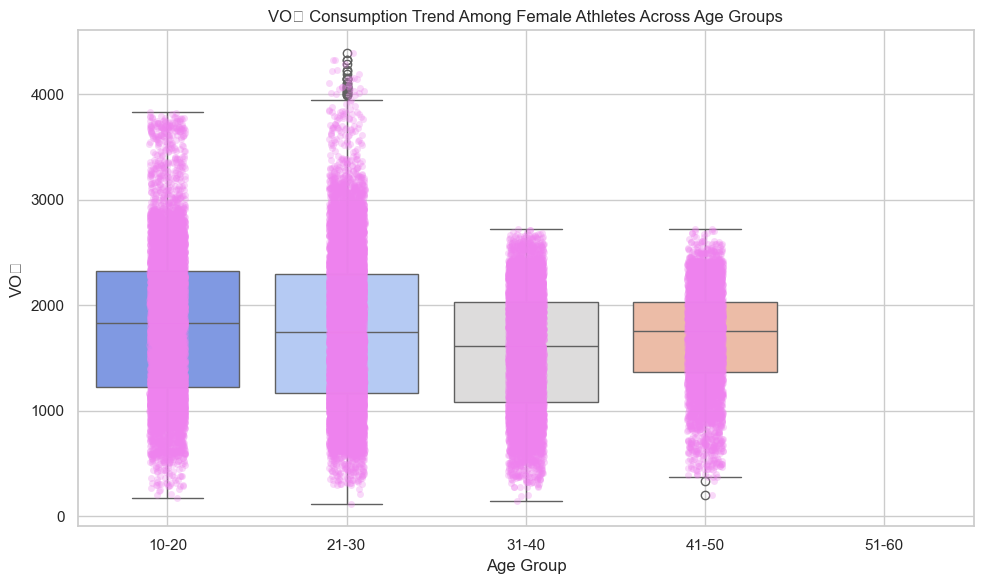

In [367]:
#80.Show the oxygen consumption trend analysis among women athletes across different age groups 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Filter only female athletes
female_df = merged_df[merged_df['Sex'] == 1]  # Assuming 1 = Female
print(female_df['Sex'].unique())

# 2. Group ages into bins (optional but helps for visualization)
female_df['AgeGroup'] = pd.cut(female_df['Age'], bins=[10, 20, 30, 40, 50, 60], labels=["10-20", "21-30", "31-40", "41-50", "51-60"])

# 3. Plot VO2 trend
plt.figure(figsize=(10, 6))
sns.boxplot(data=female_df, x='AgeGroup', y='VO2', palette='coolwarm')
sns.stripplot(data=female_df, x='AgeGroup', y='VO2', color='violet', alpha=0.3, jitter=True)
plt.title("VO₂ Consumption Trend Among Female Athletes Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("VO₂")
plt.grid(True)
plt.tight_layout()
plt.show()